# ABC Rejection

This example shows you how to perform ABC rejection on a time series (using a logisitic toy model).

In [1]:
from __future__ import print_function
import pints
import pints.toy as toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.1, 50] 
times = np.linspace(0, 100, 100)
org_values = model.simulate(real_parameters, times)

# Add noise
noise = 1
values = org_values + np.random.normal(0, noise, org_values.shape)
real_parameters = np.array(real_parameters + [noise])

# Get properties of the noise sample
noise_sample_mean = np.mean(values - org_values)
noise_sample_std = np.std(values - org_values)

# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

In [3]:
# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [0.0, 0],
    [0.2, 100]       # Throws error when noise added!!! How should we add noise to the simulated data???
)

# Set the error measure to be used to compare simulated to observed data
error_measure = pints.RootMeanSquaredError(problem)

In [10]:
abc = pints.ABCController(error_measure, log_prior)     # method = pints.ABCRejection

abc.set_max_iterations(500000)
abc.set_threshold(1.0)
abc.set_n_target(700)
abc.set_n_draws(1)       # Much slower when run in parallel and plots look wider!!!
abc.set_parallel(False) 

In [11]:
# Run!
print('Running...')
posterior_estimate = abc.run()
print('Done!')

Running...
Done!


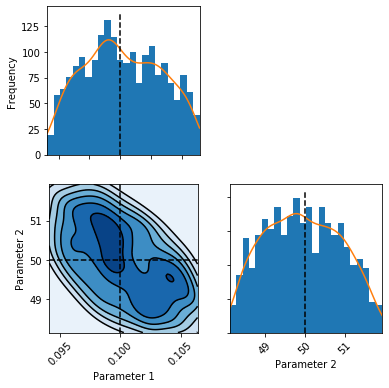

In [12]:
pints.plot.pairwise(np.array(posterior_estimate), kde = True, ref_parameters = real_parameters[:-1])
plt.show()